In [137]:
import numpy as np

In [151]:
%store -r ionosphere_export
%store -r adult_export
%store -r thoracic_export
%store -r credit_export

%store -r ionosphere_headers
%store -r adult_headers
%store -r thoracic_headers
%store -r credit_headers

In [152]:
'''
Splits to train+validation and test based on train_validation_percent.
'''
def train_test_split(datasets, train_validation_percent):
    train_test_split = {}
    train_test_split['train_and_validation'] = {}
    train_test_split['test'] = {}
    for dataset_name, dataset in datasets.items():
        shuffled_dataset = dataset[0]
        np.random.shuffle(shuffled_dataset)
        
        
        length = len(shuffled_dataset)
        train_length = int(length*train_validation_percent)
        
        train_test_split['train_and_validation'][dataset_name] = []
        
        # TRAIN _AND _VALIDATION holds datasets dict with [data, headers] for each
        train_test_split['train_and_validation'][dataset_name].append(shuffled_dataset[:train_length])
        train_test_split['train_and_validation'][dataset_name].append(dataset[1])
        
        # SET ASIDE TEST holds the testing data only
        train_test_split['test'][dataset_name] = shuffled_dataset[train_length:]

        
    return train_test_split

In [153]:
datasets = {
    "ionosphere": [ionosphere_export,ionosphere_headers],
    "adult": [adult_export,adult_headers],
    "thoracic_surgery": [thoracic_export,thoracic_headers],
    "credit_card": [credit_export,credit_headers]
}

In [154]:
'''
85% train + validation
15% test
'''
split_data = train_test_split(datasets,0.85)

'''
Set train_val variable for tests
'''
train_val = split_data['train_and_validation']

In [155]:
'''
Runs k-fold test on a datasets dict key is dataset_name and value is [data, headers].
'''
def run_cross_validations(datasets, k, use_lr=True,use_nb=True,use_nb_log=True,model_args=[]):
    results = {}
    for name,dataset in datasets.items():
        print(name, "-----")
        print("\tRunning k_fold on: ",name)
        
        naive_results = None
        logistic_results = None
        
        if(use_lr):
            print("\tRunning Logistic Regression")
            print()
            logistic_results = k_fold_cross_validation(k,dataset[0], "LogisticRegression",[],model_args)
            print()
            print("\t\tAccuracy: ",logistic_results)
            print()
        if(use_nb):
            print()
            print("\tRunning Naive Bayes Non-Log")
            print()
            naive_results = k_fold_cross_validation(k,dataset[0], "NaiveBayes",dataset[1],[False])
            print()
            print("\t\tAccuracy: ",naive_results)
            print()
        if(use_nb):
            print()
            print("\tRunning Naive Bayes Log Laplace")
            print()
            naive_results = k_fold_cross_validation(k,dataset[0], "NaiveBayesLog",dataset[1],[True])
            print()
            print("\t\tAccuracy: ",naive_results)
            print()

        results[name] = [logistic_results,naive_results]
    return results

In [156]:
%run validation.ipynb

In [ ]:
'''
Test #1: Epsilon Tests with value of 0.1,0.01,0.001 @ 0.1 learning rate

Type: 5-fold for each.
'''
%run epsilon_tests.ipynb

Running with epsilon value of  0.1
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0014           0.0015           0.0013
1  Predict           0.0000           0.0000           0.0000
2    Total           0.0014           0.0015           0.0013

		Accuracy:  0.8089265536723163

adult -----
	Running k_fold on:  adult
	Running Logistic Regression



In [ ]:
'''
Test #2: Different set termination values 1000,5000,10000 @ 0.1 learning rate

Type: 5-fold for each.
'''
%run termination_tests.ipynb

In [ ]:
'''
Test #3: Different learning rates set termination value of 10,000 at 0.01, 0.05, 0.1, 0.2 and 0.3

Type: 5-fold for each.
'''
%run learning_rate_tests.ipynb

In [ ]:
best_logistic_model_args=[10000,0.01,False,1e-2]

RUNNING 5 FOLD ON EACH DATASET
ionosphere -----
	Running k_fold on:  ionosphere
	Running Logistic Regression



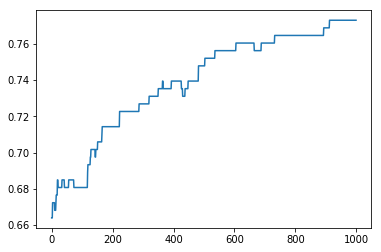

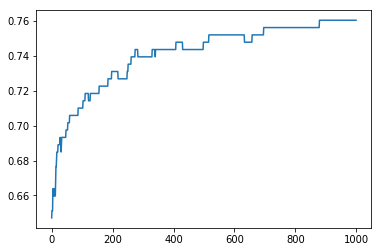

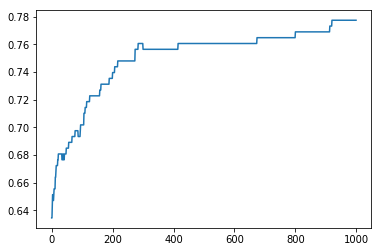

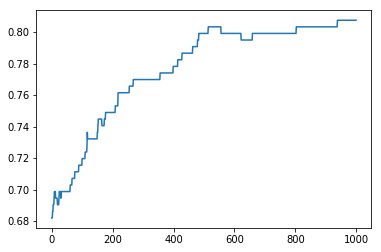

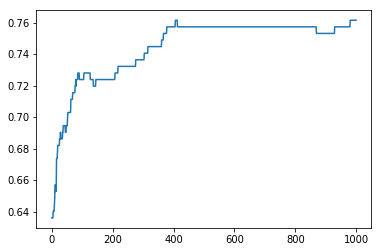

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.2274           0.2325           0.2226
1  Predict           0.0001           0.0001           0.0000
2    Total           0.2275           0.2326           0.2226

		Accuracy:  0.855819209039548


	Running Naive Bayes Non-Log

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0064           0.0064           0.0064
1  Predict           0.0046           0.0046           0.0044
2    Total           0.0110           0.0111           0.0108

		Accuracy:  0.8019774011299434


	Running Naive Bayes Log Laplace

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.0132           0.0147           0.0128
1  Predict           0.0045           0.0046           0.0044
2    Total           0.0177           0.0192           0.0173

		Accuracy:  0.8055932203389832

adult -----
	Running k_fold on:  adult
	Running Logistic Regression



KeyboardInterrupt: 

In [150]:
'''
Test #4: K-fold test on 5, 10, 15 with best parameters from **above**!
'''
%run k_fold_tests.ipynb
k_fold_tests([5,10,15])

In [148]:
'''
Test #5: Splits Test, Trains on Percentage of Training Set and Prints accuracy from Test Set

Type: Test on test set.
'''
%run 


%run:
 Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allows 

/home/harsh/anaconda3/lib/python3.7/site-packages/IPython/core/magics/execution.py:648: UserWarning: you must provide at least a filename.
  warn('you must provide at least a filename.')



Reducing to equal labels for ionosphere
Minimum label count: 103
Length of equalized data: 206
Running logistic regression on ionosphere
0.05 0.01 10000 False []


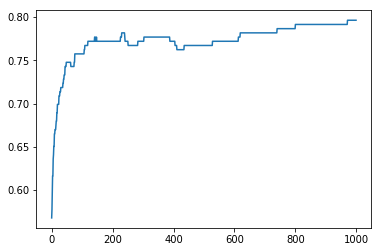



Running predictions for ionosphere
Testing on original dataset got accuracy of 0.8959731543624161
Running 5-fold for ionosphere
0.05 0.01 10000 False []


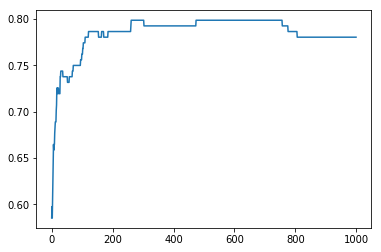

0.05 0.01 10000 False []


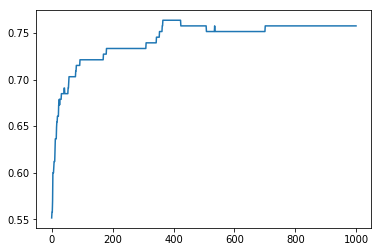

0.05 0.01 10000 False []


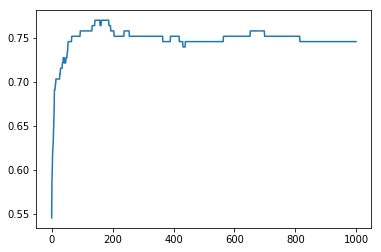

0.05 0.01 10000 False []


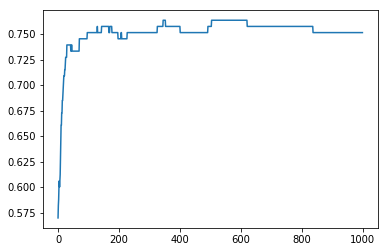

0.05 0.01 10000 False []


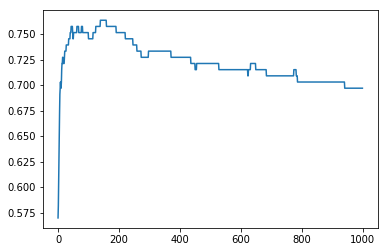

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.2285           0.2606           0.2170
1  Predict           0.0001           0.0001           0.0001
2    Total           0.2286           0.2607           0.2171
Got k-fold accuracy of: 0.7961672473867596


Reducing to equal labels for adult
Minimum label count: 9508
Length of equalized data: 19016
Running logistic regression on adult
0.05 0.01 10000 False []


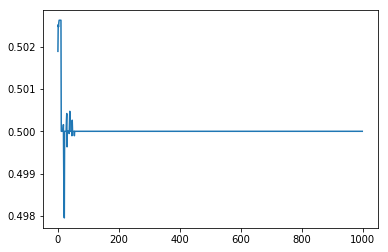



Running predictions for adult
Testing on original dataset got accuracy of 0.7758468182527707
Running 5-fold for adult
0.05 0.01 10000 False []


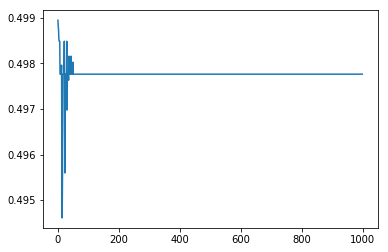

0.05 0.01 10000 False []


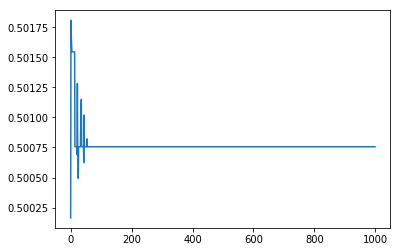

0.05 0.01 10000 False []


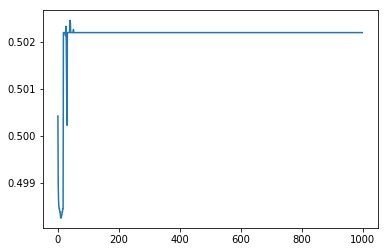

0.05 0.01 10000 False []


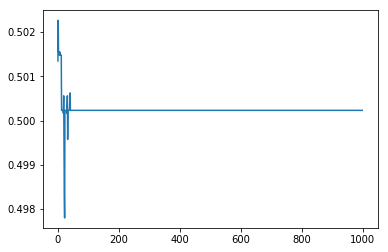

0.05 0.01 10000 False []


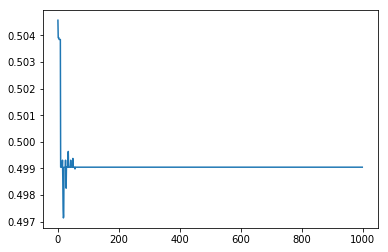

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit          71.9956          72.1722          71.6510
1  Predict           0.0015           0.0019           0.0012
2    Total          71.9971          72.1734          71.6526
Got k-fold accuracy of: 0.5337623487793826


Reducing to equal labels for thoracic_surgery
Minimum label count: 60
Length of equalized data: 120
Running logistic regression on thoracic_surgery
0.05 0.01 10000 False []


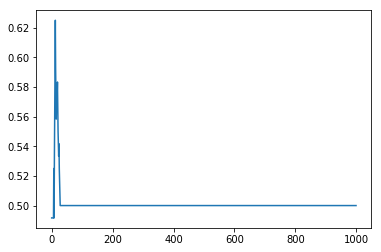



Running predictions for thoracic_surgery
Testing on original dataset got accuracy of 0.20300751879699247
Running 5-fold for thoracic_surgery
0.05 0.01 10000 False []


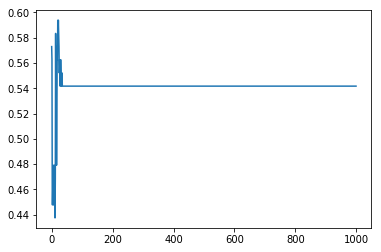

0.05 0.01 10000 False []


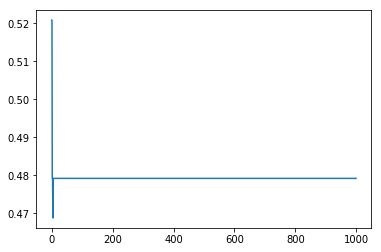

0.05 0.01 10000 False []


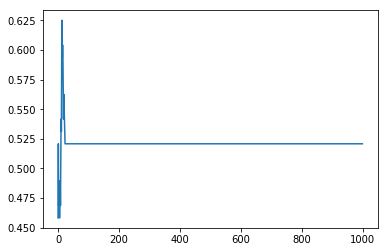

0.05 0.01 10000 False []


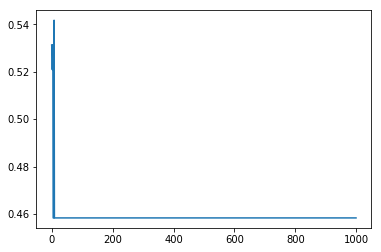

0.05 0.01 10000 False []


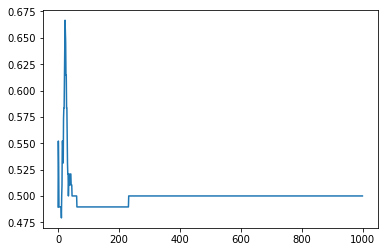

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit           0.1983           0.2173           0.1887
1  Predict           0.0001           0.0001           0.0001
2    Total           0.1984           0.2174           0.1888
Got k-fold accuracy of: 0.4916666666666667


Reducing to equal labels for credit_card
Minimum label count: 5627
Length of equalized data: 11254
Running logistic regression on credit_card
0.05 0.01 10000 False []


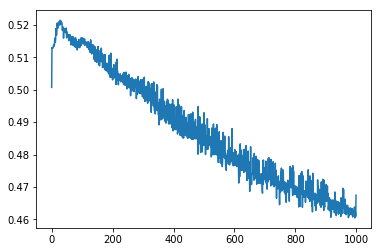



Running predictions for credit_card
Testing on original dataset got accuracy of 0.474
Running 5-fold for credit_card
0.05 0.01 10000 False []


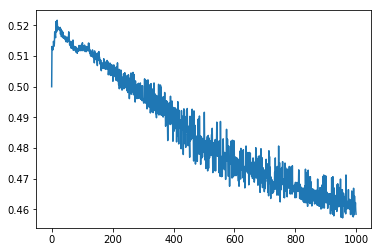

0.05 0.01 10000 False []


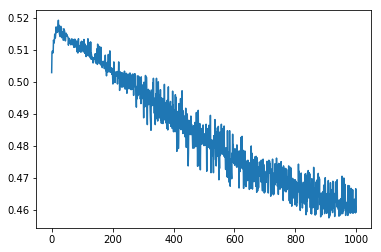

0.05 0.01 10000 False []


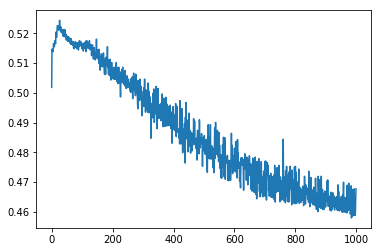

0.05 0.01 10000 False []


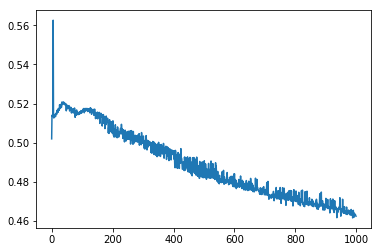

0.05 0.01 10000 False []


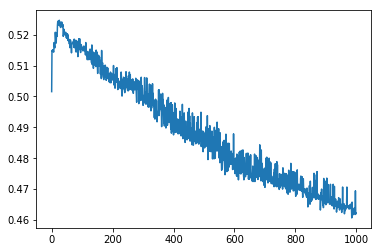

      Type Average Time (s) Maximum Time (s) Minimum Time (s)
0      Fit          21.4251          23.7475          18.7022
1  Predict           0.0008           0.0010           0.0008
2    Total          21.4259          23.7483          18.7032
Got k-fold accuracy of: 0.5507359691988746



In [73]:
'''
Test #6: Equal Labels Test removes randomized samples to have equal labels for each dataset

Type: 5-fold for each.
'''
%run equal_labels_tests.ipynb

In [ ]:
'''
Test #7: Getting Optimal Features

Type: Predict on the test that we set aside for each feature.
'''

In [ ]:
'''
Final Test: 
    Eps Vs. Num_iter
    Best LR
    Optimal Features
    Best Split
    Equal Labels if GOOD
'''